In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
%matplotlib inline

# Load and observe data

In [2]:
wine_data = load_wine()
wine_df = pd.DataFrame(
    data=wine_data.data,
    columns=wine_data.feature_names)

wine_df['target'] = wine_data.target

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
#Check for null value
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

C:\Users\nirac\anaconda3\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nirac\anaconda3\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nirac\anaconda3\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nirac\anaconda3\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nirac\anaconda3\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 44.4% of the points

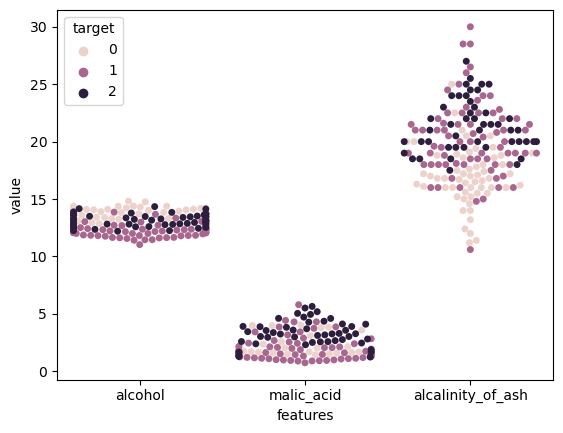

In [4]:
#plot graph to observe the data 
from seaborn import swarmplot

data_to_plot = pd.melt(wine_df[['alcohol', 'malic_acid', 'alcalinity_of_ash', 'target']],
                       id_vars='target',
                       var_name='features',
                       value_name='value')

swarmplot(data=data_to_plot, x='features', y='value', hue='target');

In [8]:
#Count target data
wine_df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

# Feature Selection: Recursive Feature Elimination (RFE) method

In [57]:
from sklearn.model_selection import train_test_split

X=wine_df.drop(['target'], axis = 1) 
y=wine_df['target']

#split to train and test data 70:30
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                shuffle = True,
                                                stratify=y,
                                                random_state=42)

# create base model for feature selection (GradientBoostingClassifier)

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

# Train classifier using all features
gbc.fit(X_train, y_train)

# Make predictions
preds = gbc.predict(X_test)

# Evaluate the model using the F1-score
f1_score_all = round(f1_score(y_test, preds, average='weighted'), 4)

print(f1_score_all)

0.9078


### Conclude: Using all features gives f1-score =  0.9078

# Perform RFE method to select importance features

In [59]:
from sklearn.feature_selection import RFE

RFE_f1_score = [] #create list to store f1-score

for k in range (1,15):
    RFE_selector = RFE(estimator=gbc, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train,y_train)
    
    #select x train, x test
    sel_X_train = RFE_selector.transform(X_train)
    sel_X_test = RFE_selector.transform(X_test)
    
    gbc.fit(sel_X_train,y_train)
    RFE_pred = gbc.predict(sel_X_test)
    
    f1_score_RFE = round(f1_score(y_test,RFE_pred, average='weighted'),2)
    
    RFE_f1_score.append(f1_score_RFE)



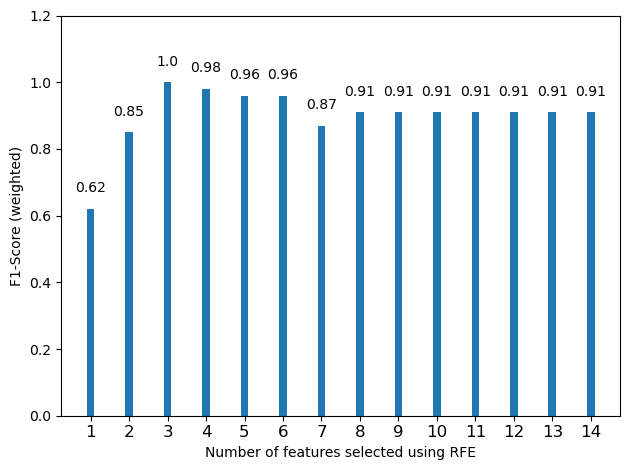

In [60]:
fig, ax = plt.subplots()

x = np.arange(1, 15)
y = RFE_f1_score

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 15))
ax.set_xticklabels(np.arange(1, 15), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [76]:
#select 5 features as it has the higest f1-score
RFE_selector = RFE(estimator=gbc, n_features_to_select=5, step=10)
RFE_selector.fit(X_train, y_train)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train.columns[selected_features_mask]
selected_features

Index(['flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines',
       'proline'],
      dtype='object')

In [101]:
X_train_new = X_train[['flavanoids',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']]

X_test_new = X_test[['flavanoids',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']]

# Train model with selected features (5 features)

In [103]:
# Train the final model using the selected features
gbc.fit(X_train_new, y_train)

# Make predictions
preds = gbc.predict(X_test_new)

# Evaluate the model using the F1-score
f1_score_new = round(f1_score(y_test, preds, average='weighted'), 4)

print(f1_score_new)

0.9632


#### Conclude: Using only selected feature improves f1-score to 0.9632

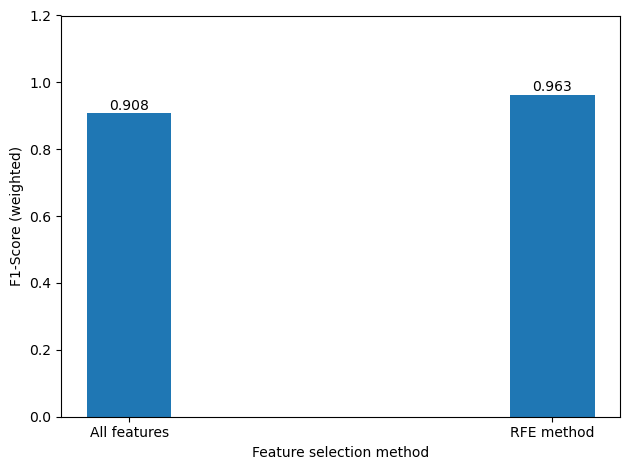

In [107]:
fig, ax = plt.subplots()

x = ['All features', 'RFE method']
y = [f1_score_all, f1_score_new]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.01, s=str(round(value,3)), ha='center')
    
plt.tight_layout()